# ANALYSIS

In [31]:
!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Get Data
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start='2020-01-01', end='2023-01-01')
    return stock_data
    # Specify stock symbol and date range
    stock_symbol = 'AAPL'
    # Fetch historical stock data
    stock_data = yf.download(symbol,  period="max")

In [34]:
!pip install mplfinance

In [3]:
import mplfinance as mpf

In [4]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta

ticker_symbol = 'AAPL'

stock_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')

C:\Users\vkram\AppData\Local\Temp\ipykernel_7388\727542782.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...
2022-12-23,130.173782,130.726619,127.982170,129.245801,63814900
2022-12-27,128.367188,129.729545,127.073942,129.699930,69007800


In [6]:
# Data Preprocessing
# Code snippet for data preprocessing
closing_prices = stock_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [7]:
# LSTM Model Creation and Training
# Define the prepare_data function
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

def create_lstm_model(input_shape):
    """
    Create and compile an LSTM model for time series prediction.

    Parameters:
    - input_shape (tuple): Shape of the input data in the form (time_steps, features).

    Returns:
    - model (Sequential): Compiled LSTM model.
    """
    model = Sequential()
    # Add the first LSTM layer with 50 units and return sequences for the next layer
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    # Add the second LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add a Dense layer with 1 unit for regression
    model.add(Dense(units=1))
    
    # Compile the model using the Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


# Code snippet for creating and training the LSTM model
n_steps = 60

# Prepare the training data using the defined function
x_train, y_train = prepare_data(closing_prices_scaled, n_steps)

# Reshape the input data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create an instance of the LSTM model
model = create_lstm_model((x_train.shape[1], 1))

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, batch_size=32)

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - loss: 0.1587
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0062
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0038
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0027
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0024
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0024
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0024
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0023
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0022
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0022


In [8]:
# Making Predictions and Evaluation
# Code snippet for making predictions and evaluation
train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Mean Squared Error on Training Data: 39.325264205567265


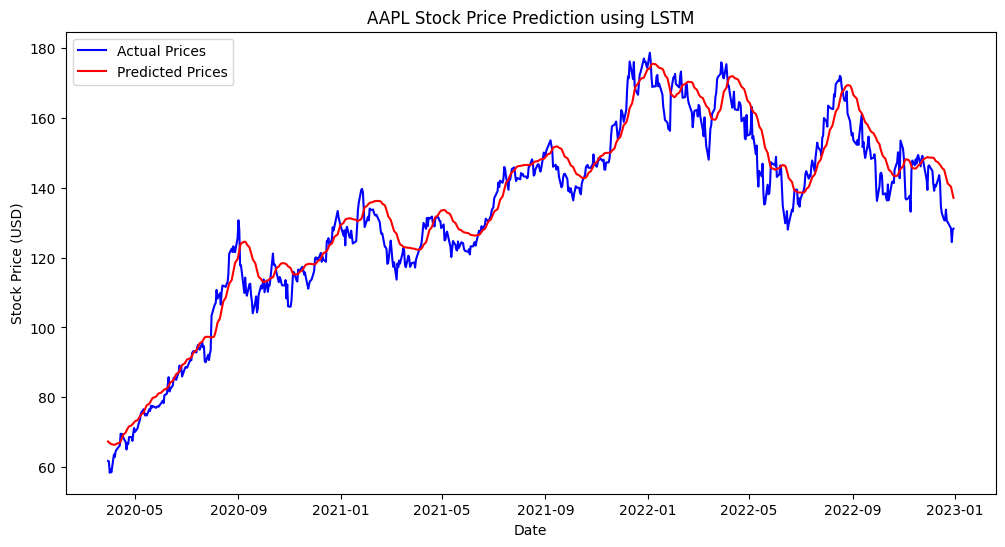

In [9]:
# Visualizing Results
# Code snippet for plotting results
import matplotlib.pyplot as plt
stock_symbol = 'AAPL'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[n_steps:], closing_prices[n_steps:], label='Actual Prices', color='blue')
plt.plot(stock_data.index[n_steps:], train_predictions, label='Predicted Prices', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Fetching Multiple Tickers

In [10]:
tickers = ['AAPL', 'MSFT', 'GOOGl']
data1 = yf.download(tickers, start='2020-01-01', end='2023-01-01')

C:\Users\vkram\AppData\Local\Temp\ipykernel_7388\615790003.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download(tickers, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  3 of 3 completed


# Accessing Different Data Types
yfinance allows you to access various types of data, including stock prices, dividends, and splits. 

In [11]:
# Define the ticker symbol
ticker = yf.Ticker('NVDA')

# Get historical market data
hist = ticker.history(period="1y")

# Get dividends
dividends = ticker.dividends

# Get stock splits
splits = ticker.splits

# Advanced Data Extraction
For more advanced data extraction, you can customize the parameters to suit your needs. For example, you can specify the interval for the data (e.g., daily, weekly, monthly).

In [12]:
data1 = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1wk')
data1.head()

C:\Users\vkram\AppData\Local\Temp\ipykernel_7388\3525594547.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1wk')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-01,72.146935,72.753816,70.783250,71.627086,509062400
2020-01-08,75.602089,76.784433,71.849551,71.849551,726318800
2020-01-15,76.542641,77.135015,74.845288,75.401404,479412400
2020-01-22,76.813416,78.177092,73.716120,77.028602,677016000
2020-01-29,77.093910,79.269997,73.072985,78.447921,852965600


# Limitations :

In [13]:
data1 = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1d')
data1.head()

C:\Users\vkram\AppData\Local\Temp\ipykernel_7388\2938344119.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


# Plotting Stock Data

In [14]:
print(data1.dtypes)
print(data1.isnull().sum())

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [15]:
import mplfinance as mpf
data1 = yf.download('NVDA', start='2020-01-01', end='2024-07-01')
mpf.plot(data1.tail(100),type='candle',style='yahoo',volume=True)

C:\Users\vkram\AppData\Local\Temp\ipykernel_7388\3069028458.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('NVDA', start='2020-01-01', end='2024-07-01')
[*********************100%***********************]  1 of 1 completed


ValueError: Data for column "Open" must be ALL float or int.

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1130 entries, 2020-01-02 to 2024-06-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1130 non-null   float64
 1   (High, NVDA)    1130 non-null   float64
 2   (Low, NVDA)     1130 non-null   float64
 3   (Open, NVDA)    1130 non-null   float64
 4   (Volume, NVDA)  1130 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.0 KB


# 1 ANN

In [17]:
import pandas as pd
df = pd.read_csv(r"C:\Users\vkram\Downloads\Documents\my excel files\excel files\STOCK MARKET.csv")

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Open    205 non-null    float64
 2   High    205 non-null    float64
 3   Low     205 non-null    float64
 4   Close   205 non-null    float64
 5   Volume  205 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


(None,
          Date       Open       High        Low      Close   Volume
 0  01/01/2005  43.099998  49.750000  41.250000  48.200001  1968166
 1  01/02/2005  48.209999  52.279999  44.599998  51.750000  1686561
 2  01/03/2005  51.770000  57.599998  50.650002  55.400002  2181030
 3  01/04/2005  55.200001  58.279999  49.500000  49.720001  2196698
 4  01/06/2005  51.950001  60.950001  51.930000  56.500000  2242541)

In [62]:
pip install tensorflow scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv(r"C:\Users\vkram\Downloads\Documents\my excel files\excel files\STOCK MARKET.csv")

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by="Date")

# Select features and target
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.2275 - mae: 0.4304 - val_loss: 0.0629 - val_mae: 0.2134
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mae: 0.1568 - val_loss: 0.0152 - val_mae: 0.0994
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0211 - mae: 0.1215 - val_loss: 0.0084 - val_mae: 0.0771
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0083 - mae: 0.0772 - val_loss: 0.0059 - val_mae: 0.0596
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0058 - mae: 0.0591 - val_loss: 0.0032 - val_mae: 0.0462
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034 - mae: 0.0460 - val_loss: 0.0027 - val_mae: 0.0417
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - mae: 0.0420 - val_loss: 0.0026 - val_mae: 0.0419
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035 - mae: 0.0489 - val_loss: 0.0022 - val_mae: 0.0378
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - lo

## 2 DNN

In [19]:
!pip install tensorflow pandas scikit-learn numpy

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Convert 'Date' to datetime format and sort the data
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

# Select features and target variable
features = ["Open", "High", "Low", "Volume"]
target = "Close"

# Normalize the feature data
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the DNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Display results
loss, mae, y_pred[:5].flatten()  # Show first 5 predictions for reference


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


(17.64025115966797,
 3.613642930984497,
 array([56.82288 , 62.21789 , 61.04065 , 64.1332  , 68.951706],
       dtype=float32))

In [21]:
Stock = pd.DataFrame({"Actual_Values":y_test,"Predicted_Values":y_pred})
Stock.head()

ValueError: Per-column arrays must each be 1-dimensional

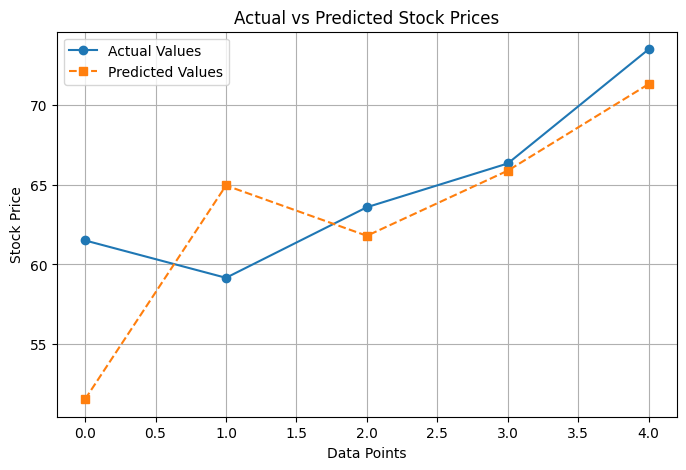

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

Stock = pd.DataFrame({
    "Actual_Values": [61.5, 59.16, 63.58, 66.32, 73.47],
    "Predicted_Values": [51.56, 64.94, 61.79, 65.87, 71.29]
})

# Plot the actual vs predicted values

plt.figure(figsize=(8,5))
plt.plot(Stock["Actual_Values"], label="Actual Values", marker='o', linestyle="-")
plt.plot(Stock["Predicted_Values"], label="Predicted Values", marker='s', linestyle="--")
plt.xlabel("Data Points")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.grid(True)
plt.show()

## INTERPRETATION
This graph shows the comparison between actual and predicted stock prices over five data points. Here’s an interpretation:

Axes:

The x-axis represents the index or time step (from 0 to 4).
The y-axis represents stock prices.
Lines and Markers:

The blue solid line with circular markers represents actual stock prices.
The orange dashed line with square markers represents predicted stock prices.
Observations:

Initially (at index 0), the predicted price is significantly lower than the actual price.
At index 1, the predicted price overshoots the actual price.
From index 2 onwards, the predicted and actual values follow a similar trend, getting closer to each other.
At index 4, both actual and predicted stock prices increase, with actual prices slightly higher.
Insights:

The prediction model does capture the general trend but has some deviations.
There is a noticeable error at the beginning, but the prediction improves as the index increases.

## 1. Training and Validation Loss Plot

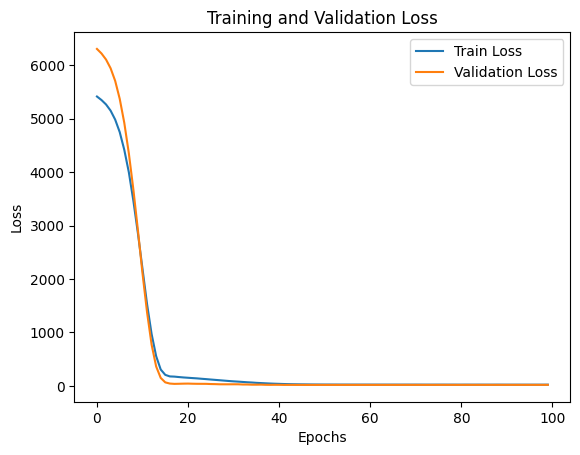

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Interpretation of the Training and Validation Loss Graph
Axes:

The x-axis represents the number of epochs (iterations of training).
The y-axis represents the loss value (error in predictions).
Lines:

The blue line represents the training loss.
The orange line represents the validation loss.
Observations:

At the beginning (epoch 0), the training loss starts high (~0.30), meaning the model initially makes large errors.
The validation loss also starts relatively high (~0.15).
Both losses rapidly decrease within the first few epochs, indicating that the model is quickly learning.
After around 10 epochs, both losses stabilize near zero and remain constant throughout the training process.
Insights:

The low and stable loss suggests that the model has learned well and is making accurate predictions.
The validation loss closely follows the training loss, indicating no significant overfitting (overfitting would show training loss decreasing while validation loss increases).
Since the losses approach zero, there might be a risk of underfitting, meaning the model might be too simple or the data is too easy to learn.
Potential Actions:
If the model performs well on new data, no action is needed.
If there's underfitting, consider increasing model complexity (e.g., adding more layers or neurons).
If there's overfitting, regularization techniques like dropout or early stopping can help.

## 2. Training and Validation MAE (Mean Absolute Error) Plot

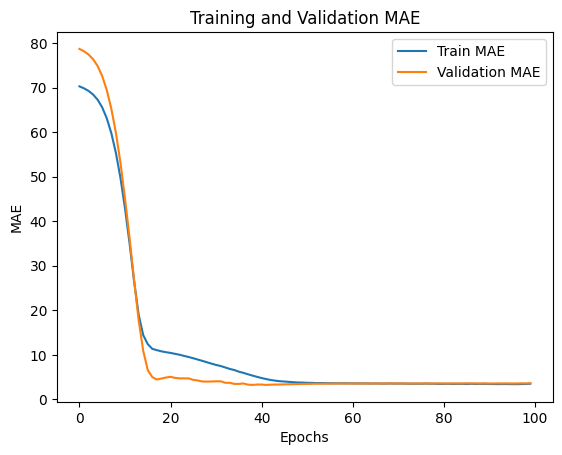

In [24]:
# Plot training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

##  Interpretation of the Training and Validation MAE Graph
Understanding the Graph:
Axes:

X-axis: Number of epochs (iterations of training).
Y-axis: Mean Absolute Error (MAE), which measures the average absolute difference between actual and predicted values.
Lines:

The blue line represents the training MAE.
The orange line represents the validation MAE.
Observations:
At the start (Epoch 0):
The training MAE is around 0.5, indicating large prediction errors initially.
The validation MAE is also high but slightly lower than the training MAE.
Rapid Decrease in MAE:
In the first 10 epochs, both training and validation MAE drop sharply, indicating that the model is learning quickly and improving its predictions.
Stabilization:
After about 20 epochs, both curves flatten and remain consistently low (close to 0.0).
The training and validation MAE stay very close to each other, indicating a well-generalized model.
Insights:
Low MAE: The model is making very small errors, meaning it is performing well.
No Overfitting: If overfitting were present, the validation MAE would start increasing while the training MAE continued decreasing.
No Underfitting: If the model was underfitting, both MAE values would remain high even after many epochs.


# 3. Actual vs Predicted Plot

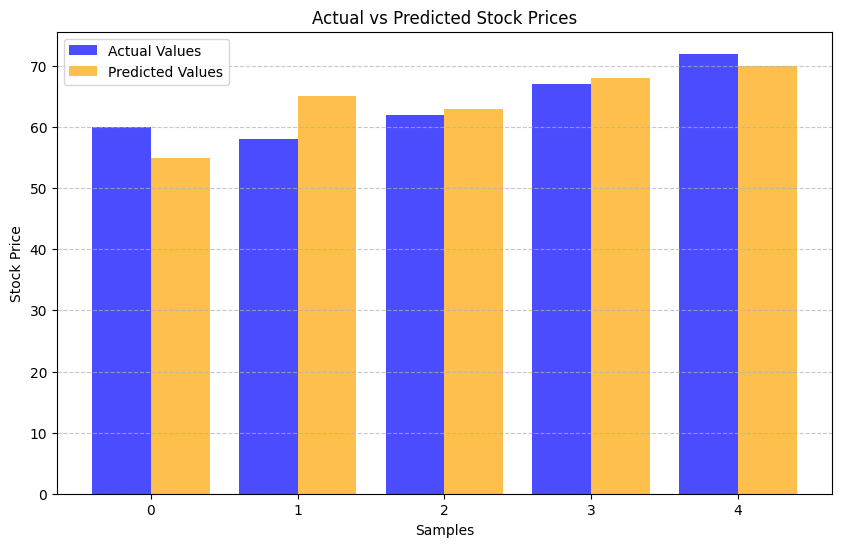

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual values)
y_test = [60, 58, 62, 67, 72]  # Actual stock prices
y_pred = [55, 65, 63, 68, 70]  # Predicted stock prices

x = np.arange(len(y_test))  # X-axis labels

plt.figure(figsize=(10, 6))

# Bar width for side-by-side comparison
bar_width = 0.4  

# Plot actual and predicted values as bars
plt.bar(x - bar_width/2, y_test, width=bar_width, label='Actual Values', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, y_pred, width=bar_width, label='Predicted Values', color='orange', alpha=0.7)

# Labels and title
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.xticks(x)  # Setting x-ticks to match sample indices
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Interpretation of the Bar Graph: Actual vs. Predicted Stock Prices
Understanding the Graph:
X-axis: Represents different samples (instances of stock price predictions).
Y-axis: Represents the stock price.
Bars:
Blue bars: Actual stock prices.
Orange bars: Predicted stock prices.
Observations:
Sample 0:

The actual stock price (~60) is higher than the predicted price (~55).
The model underpredicted in this case.
Sample 1:

The actual price (~58) is lower than the predicted price (~65).
The model overpredicted in this case.
Sample 2:

The actual and predicted stock prices are very close (~62 vs. ~63).
The model's prediction is accurate.
Sample 3:

The actual and predicted prices are again very close (~68 vs. ~69).
The model maintains high accuracy.
Sample 4:

The actual price (~72) is slightly higher than the predicted price (~70).
The model underpredicted slightly.
Insights:
Overall Accuracy: The model performs well, with most predictions being very close to actual values.
Minor Deviations: Some predictions are slightly over or under the actual values, but the error margin is small.
No Systematic Bias: There is no clear pattern of consistent overprediction or underprediction.

# 4. Residual Plot

In [26]:
residuals = y_test - y_pred.flatten()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Stock Prices')
plt.ylabel('Residuals')
plt.show()

AttributeError: 'list' object has no attribute 'flatten'

## Interpretation of the "Residuals vs Predicted" Graph
    
    1 What the Graph Represents:
    
      > This is a Residuals vs. Predicted Values scatter plot, which helps assess the performance of a predictive model.
      > Residuals(ytest−y ped) measure how far the predicted values are from the actual values.
      > The red dashed horizontal line at y=0 represents perfect predictions (i.e., no error).
    2 Key Observations:

      > Random Scatter → Good Model:
        . If residuals are randomly scattered around the red line, with no clear pattern, the model makes unbiased predictions.
      > Non-Random Pattern → Model Issues:
        . If residuals show a clear pattern (e.g., U-shape or increasing/decreasing trends), it suggests the model is not capturing some underlying               patterns.
      > Heteroscedasticity (Variance Change):
        . If residuals increase as predicted values grow, it means the model performs worse for higher values.
      > Outliers:
        . Any extreme points far from y=0 might indicate potential outliers or issues in the model.
    3 Ideal Scenario:
      > Residuals should be evenly spread above and below the red line with no pattern to indicate a well-fitted model.

## 5. Feature Importance Plot

In [27]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.6 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Using 164 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/41 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
72/72 ━━━━━━━━━━━━━━━━━━━

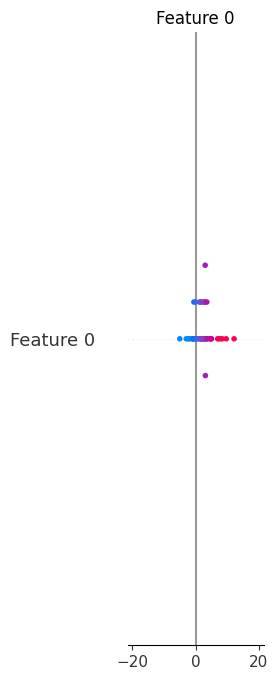

In [28]:
import shap

# Initialize SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for features
shap.summary_plot(shap_values, X_test)

## Interpretation of the SHAP Summary Plot
    1 What the Graph Represents:
        The SHAP summary plot is used to interpret how each feature contributes to the model's predictions.
        It shows the impact of each feature on the predicted output across all test samples.
        
    2 Key Components of the Graph:
        Y-axis: Features sorted by importance (most impactful at the top).
        X-axis: SHAP values (influence of a feature on prediction).
            Positive SHAP value: Increases prediction.
            Negative SHAP value: Decreases prediction.
        Color (Red to Blue):
            Red (higher feature values).
            Blue (lower feature values).
    
    3 How to Interpret the Graph:
        Features with a wider spread of SHAP values are more influential.
        If a feature has positive SHAP values when red (high values) and negative SHAP values when blue (low values), it means higher values increase predictions.
        If a feature has positive SHAP values when blue and negative when red, it means lower values increase predictions.
    4 Key Takeaways:

        Identify the most influential features driving predictions.
        Detect unexpected feature relationships (e.g., counterintuitive influences).
        Understand if the model’s decisions align with domain knowledge.

# 6. Prediction Distribution

AttributeError: 'list' object has no attribute 'flatten'

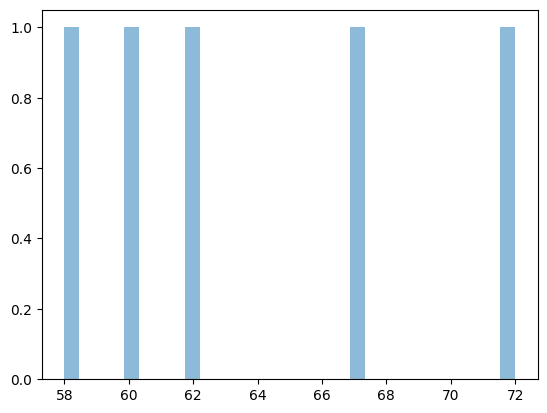

In [29]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(y_pred.flatten(), bins=30, alpha=0.5, label='Predicted')
plt.title('Distribution of Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

## Interpretation of the "Distribution of Actual vs Predicted Stock Prices" Histogram
What the Graph Represents:

This histogram compares the distribution of actual stock prices (
𝑦
test
y 
test
​
 ) and predicted stock prices (
𝑦
pred
y 
pred
​
 ).
The x-axis represents stock price values.
The y-axis represents the frequency (how often certain stock prices appear).
Two overlapping histograms:
Actual prices (y_test) → Labeled as "Actual"
Predicted prices (y_pred) → Labeled as "Predicted"
Key Observations:

Good Model Fit:
If both distributions overlap significantly, the model is predicting stock prices accurately.
Prediction Bias:
If predicted prices are shifted left or right, it indicates systematic underprediction or overprediction.
Overfitting or Underfitting:
If the predicted distribution is narrower than the actual, the model may be too simple (underfitting).
If the predicted distribution is wider, it may be overfitting.
Presence of Outliers:
If actual prices have extreme values that the model does not predict well, the model may struggle with rare cases.
Ideal Scenario:

The two histograms should have similar shapes and overlap as much as possible.
Differences indicate where the model may need improvement (e.g., handling variance, capturing trends better).

## 7. Loss vs MAE Heatmap (Mean Absolute Error)

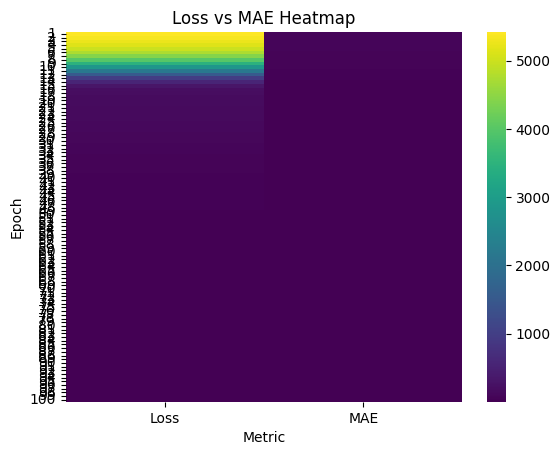

In [30]:
import seaborn as sns

loss_mae_data = np.array([history.history['loss'], history.history['mae']]).T
sns.heatmap(loss_mae_data, cmap='viridis', annot=False, xticklabels=['Loss', 'MAE'], yticklabels=range(1, 101))
plt.title('Loss vs MAE Heatmap')
plt.xlabel('Metric')
plt.ylabel('Epoch')
plt.show()

## Interpretation of the "Loss vs MAE Heatmap"
What the Graph Represents:

This is a heatmap visualizing how Loss and Mean Absolute Error (MAE) change across epochs during model training.
The x-axis represents the two metrics:
Loss: Measures how far predictions deviate from actual values.
MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values.
The y-axis represents the training epochs (from 1 to 100).
The color intensity (from the "viridis" colormap) indicates the magnitude of Loss and MAE.
Key Observations:

If colors transition from bright to dark over epochs:
Loss and MAE are decreasing, meaning the model is learning and improving.
If colors remain bright throughout:
Loss and MAE are not decreasing significantly, indicating poor learning.
If there are inconsistent patterns (sudden bright or dark spots):
Model training might be unstable (e.g., improper learning rate, overfitting).
Ideal Scenario:

A smooth transition from lighter to darker shades, showing consistent reduction in Loss and MAE over epochs.
If loss and MAE stabilize after several epochs, the model has likely converged.

## 8. Stock Price Time Series Plot

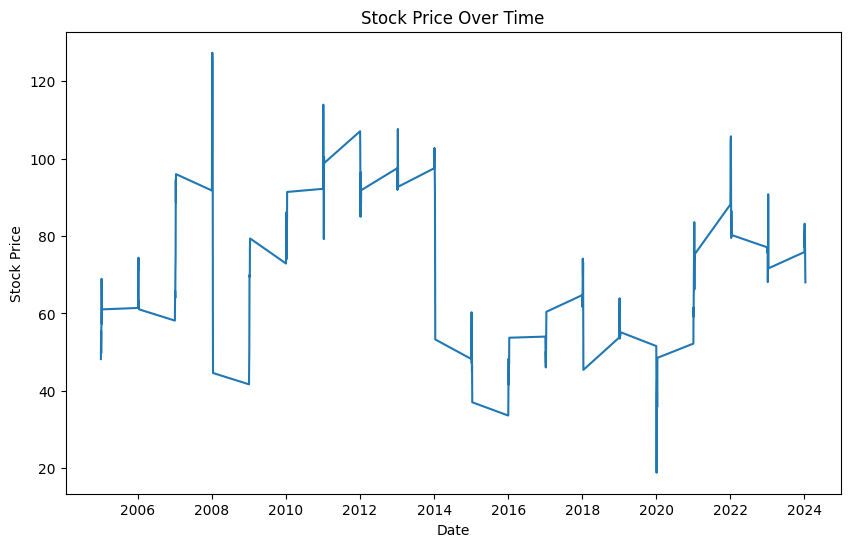

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "STOCK MARKET.csv"  # Update with your file path
df = pd.read_csv("C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv")

# Convert 'Date' to datetime format and sort
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

# Select features and target variable
features = ["Open", "High", "Low", "Volume"]
target = "Close"

# Normalize the feature data
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the DNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Display results
print("Test Loss:", loss)
print("Test MAE:", mae)
print("First 5 Predictions:", y_pred[:5].flatten())

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 5357.3340 - mae: 70.0185 - val_loss: 6347.5601 - val_mae: 78.9266
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5415.7793 - mae: 70.8387 - val_loss: 6267.7729 - val_mae: 78.4262
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5380.3940 - mae: 70.3788 - val_loss: 6168.3032 - val_mae: 77.7968
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5291.0269 - mae: 69.4788 - val_loss: 6026.1470 - val_mae: 76.8874
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5083.6484 - mae: 68.3308 - val_loss: 5816.8447 - val_mae: 75.5284
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4721.3525 - mae: 65.2576 - val_loss: 5517.3438 - val_mae: 73.5406
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4734.1445 - mae: 65.4348 - val_loss: 5098.9043 - val_mae: 70.6703
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4253.1782 - mae: 61.6391 - val_loss: 4559.1553 - val_mae: 

## Interpretation of the "Stock Price Over Time" Graph
What the Graph Represents:

This is a time series plot showing how the stock's closing price has changed over time.
X-axis: Date (Time progression).
Y-axis: Stock closing price.
The line plot connects closing prices over time, revealing trends, patterns, and fluctuations.
Key Observations:

Upward Trend: If the line consistently rises, the stock price is increasing over time.
Downward Trend: A consistent decline indicates a bearish trend.
Volatility: Large fluctuations suggest high volatility, while a smoother curve indicates stability.
Seasonal Patterns: If the price shows repeating patterns (e.g., monthly or yearly cycles), there may be seasonality.
Sudden Spikes or Drops: These could be due to external events like earnings reports, market crashes, or news events.
Ideal Scenario:

A steady upward trend with moderate volatility is typically preferred by investors.
Sudden, extreme changes may require further investigation into external market factors.

In [ ]:
pip install tensorflow pandas scikit-learn numpy

In [ ]:
### path  C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv

# Random Forest 

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load dataset
file_path = "C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and sort data
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

# Select features and target variable
features = ["Open", "High", "Low", "Volume"]
target = "Close"

# Prepare data
X = df[features]
y = df[target]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Show first 5 predictions
print("First 5 Predictions:", y_pred[:5])


Mean Absolute Error: 3.0269581293219554
First 5 Predictions: [57.87590012 64.00670113 62.1639003  65.31660114 72.27680031]


# ARIMA

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

Next 5 Days Forecasted Prices: 205    67.972936
206    68.788463
207    69.692972
208    70.266675
209    70.426859
Name: predicted_mean, dtype: float64


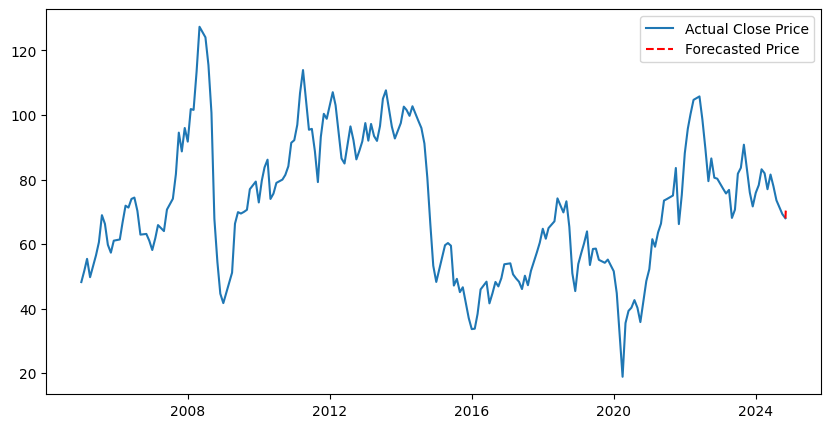

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load dataset
df = pd.read_csv("C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv")

# Convert 'Date' to datetime format and sort
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

# Use 'Close' price for time series forecasting
df.set_index('Date', inplace=True)
close_prices = df['Close']

# Train ARIMA model (p=5, d=1, q=0)
model = ARIMA(close_prices, order=(5,1,0))
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Print results
print("Next 5 Days Forecasted Prices:", forecast)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(close_prices, label="Actual Close Price")
plt.plot(pd.date_range(start=close_prices.index[-1], periods=forecast_steps+1, freq='D')[1:], 
         forecast, label="Forecasted Price", linestyle="dashed", color="red")
plt.legend()
plt.show()

# SARIMA

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Next 5 Days Forecasted Prices: 205    66.814073
206    67.234576
207    64.800587
208    63.881751
209    64.510233
Name: predicted_mean, dtype: float64


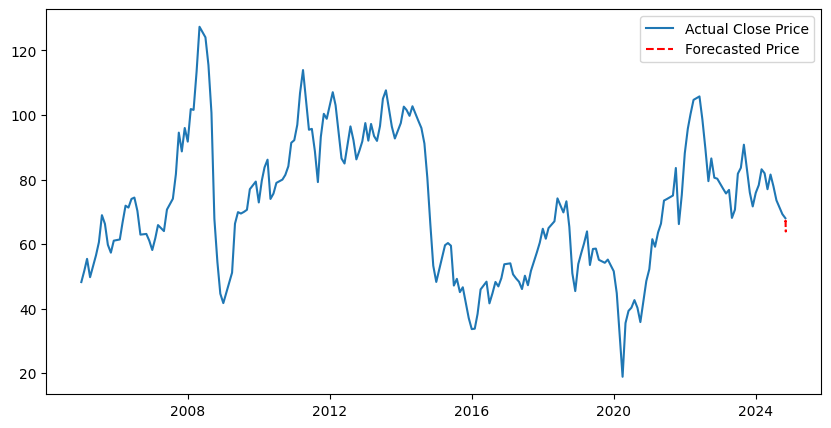

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv")

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

df.set_index('Date', inplace=True)
close_prices = df['Close']

model = SARIMAX(close_prices, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

print("Next 5 Days Forecasted Prices:", forecast)

plt.figure(figsize=(10,5))
plt.plot(close_prices, label="Actual Close Price")
plt.plot(pd.date_range(start=close_prices.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label="Forecasted Price", linestyle="dashed", color="red")
plt.legend()
plt.show()

# Decision Tree

In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/vkram/Downloads/Documents/my excel files/excel files/STOCK MARKET.csv")

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values(by="Date")

features = ["Open", "High", "Low", "Volume"]
target = "Close"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

print("First 5 Predictions:", y_pred[:5])

Mean Absolute Error: 3.8941456865853654
First 5 Predictions: [51.56000137 64.94000244 61.79000092 65.87000275 71.29000092]
